In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import seaborn as sns
from sklearn import cluster, metrics, decomposition, preprocessing

In [11]:
from math import pi
import pickle
import re

from sklearn.preprocessing import PowerTransformer, MinMaxScaler,\
                                  StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
data = pd.read_csv('P5_data_cleaned.csv')

In [5]:
data.head()

,Unnamed: 0,customer_unique_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,review_mean_score,customer_seniority,Nb_days_last_purchase
0,0,861eff4711a542e4b93843c6dd7febb0,14409,franca,south_east,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,south_east,office,1,1,office,124.99,4.0,571,571
1,1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,itaquaquecetuba,south_east,office,1,2,office,225.98,1.0,453,453
2,2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,north,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,itaquaquecetuba,south_east,office,1,2,office,225.98,1.0,453,453
3,3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,south,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,itaquaquecetuba,south_east,office,1,1,office,124.99,3.0,521,521
4,4,23397e992b09769faf5e66f9e171a241,25931,mage,south_east,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,itaquaquecetuba,south_east,office,1,1,office,106.99,4.0,281,281


In [6]:
data = data.drop(['Unnamed: 0'], axis=1)

data.dtypes

In [7]:
data.nb_order.value_counts()

1     106395
2       9771
3       1284
4        319
5        154
6         91
7         63
9         42
14        42
Name: nb_order, dtype: int64

In [8]:
data = data.drop_duplicates('customer_unique_id')

## Analyse exploratoire de donees

In [9]:
data.dtypes

customer_unique_id                object
zip_code_prefix                    int64
city                              object
region                            object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_photos_qty               float64
seller_city     

In [10]:
data.product_category_name.value_counts()

home                     22543
computers_electronics    20222
health_beauty            11250
culture_entertainment     8976
children                  6412
pet_garden                5046
office                    3916
auto                      3743
other                     3671
fashion                   3079
construction              1580
food_drink                 876
party                      152
Name: product_category_name, dtype: int64

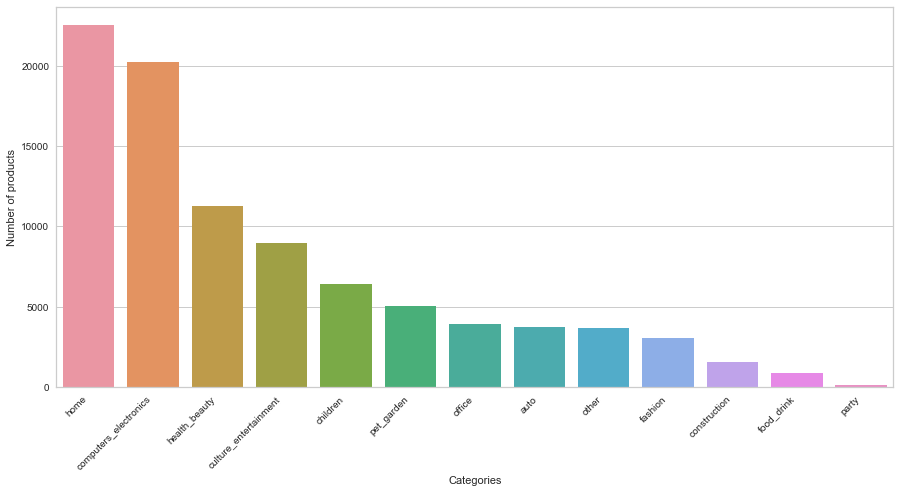

In [12]:
productsByCategory = \
  data.product_category_name.value_counts()

plt.figure(figsize=(15, 7))
sns.barplot(x=productsByCategory.index[:30],
            y=productsByCategory.values[:30])
plt.xlabel('Categories')
plt.ylabel('Number of products')
# plt.xticks(rotation=-90)
plt.xticks(rotation=45, ha='right')
plt.show()

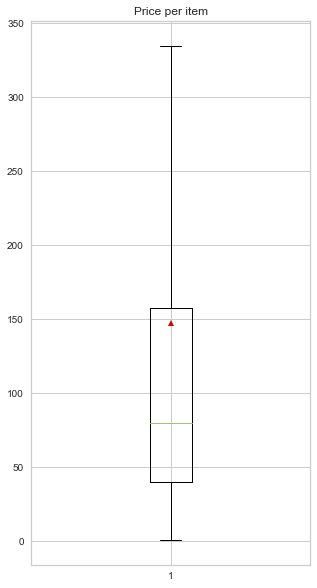

In [13]:
#Prix des produits
plt.figure(figsize=(5, 10))
plt.boxplot(data.groupby('product_id').mean()['price'],
            showfliers=False,
            showmeans=True)
plt.title('Price per item')
plt.show()

In [14]:
data.seller_region.value_counts()

south_east      76266
south           12344
north_east       1468
central_west     1367
north              21
Name: seller_region, dtype: int64

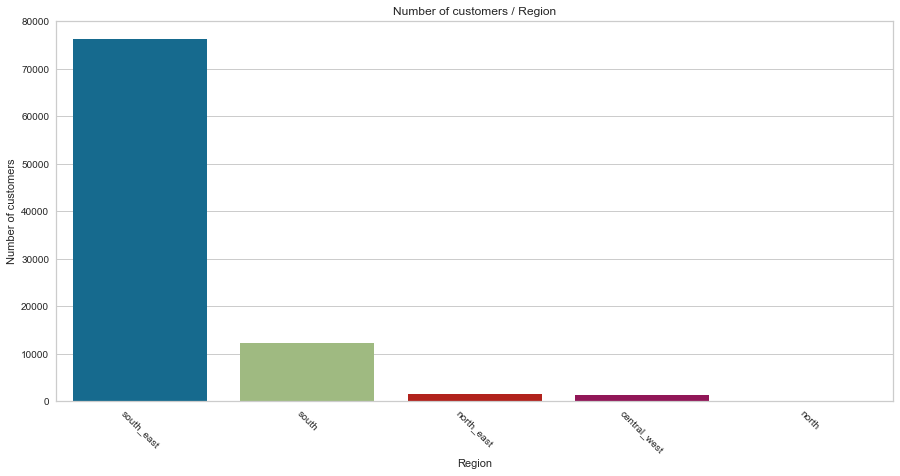

In [15]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data.seller_region.value_counts().index,
            y=data.seller_region.value_counts().values)
plt.title('Number of customers / Region')
plt.xlabel('Region')
plt.ylabel('Number of customers')
plt.xticks(rotation=-45)
plt.show()

In [16]:
data.seller_city.value_counts()

sao paulo              22835
ibitinga                6020
curitiba                2518
santo andre             2486
belo horizonte          2182
                       ...  
jacarei / sao paulo        1
pinhais/pr                 1
viana                      1
tres coroas                1
belford roxo               1
Name: seller_city, Length: 583, dtype: int64

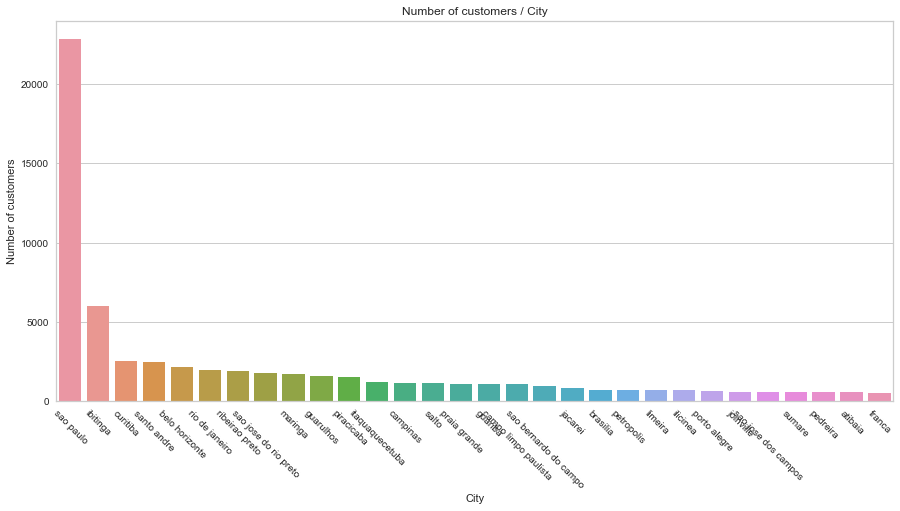

In [17]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data.seller_city.value_counts().index[:30],
            y=data.seller_city.value_counts().values[:30])
plt.title('Number of customers / City')
plt.xlabel('City')
plt.ylabel('Number of customers')
plt.xticks(rotation=-45)
plt.show()

In [18]:
data.order_status.value_counts()

delivered    91460
canceled         6
Name: order_status, dtype: int64

In [19]:
data.payment_type.value_counts()

credit_card    69438
boleto         18211
voucher         2411
debit_card      1406
Name: payment_type, dtype: int64

<AxesSubplot:title={'center':'methods of payment'}>

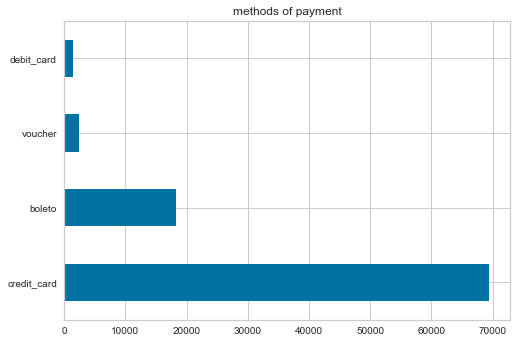

In [20]:
p_type = data.payment_type.value_counts()
p_type.plot(kind='barh', title="methods of payment")

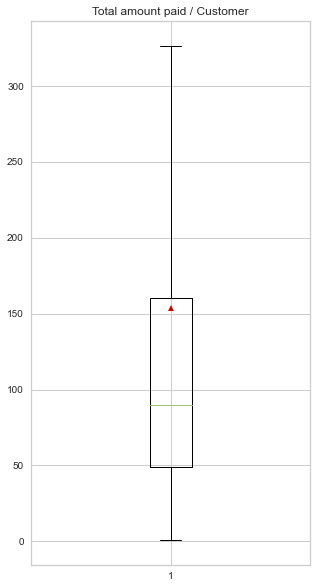

In [21]:
plt.figure(figsize=(5, 10))
plt.boxplot(data.groupby('customer_unique_id').mean()['orders_tot_amount'],
            showfliers=False,
            showmeans=True)
plt.title('Total amount paid / Customer')
plt.show()

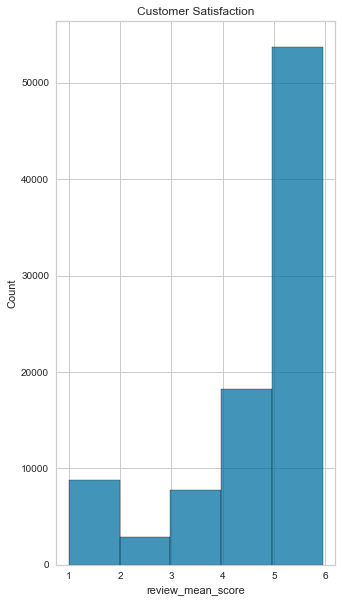

In [22]:
plt.figure(figsize=(5, 10))
sns.histplot(data.review_mean_score, binwidth=0.99)
plt.title('Customer Satisfaction')
plt.show()

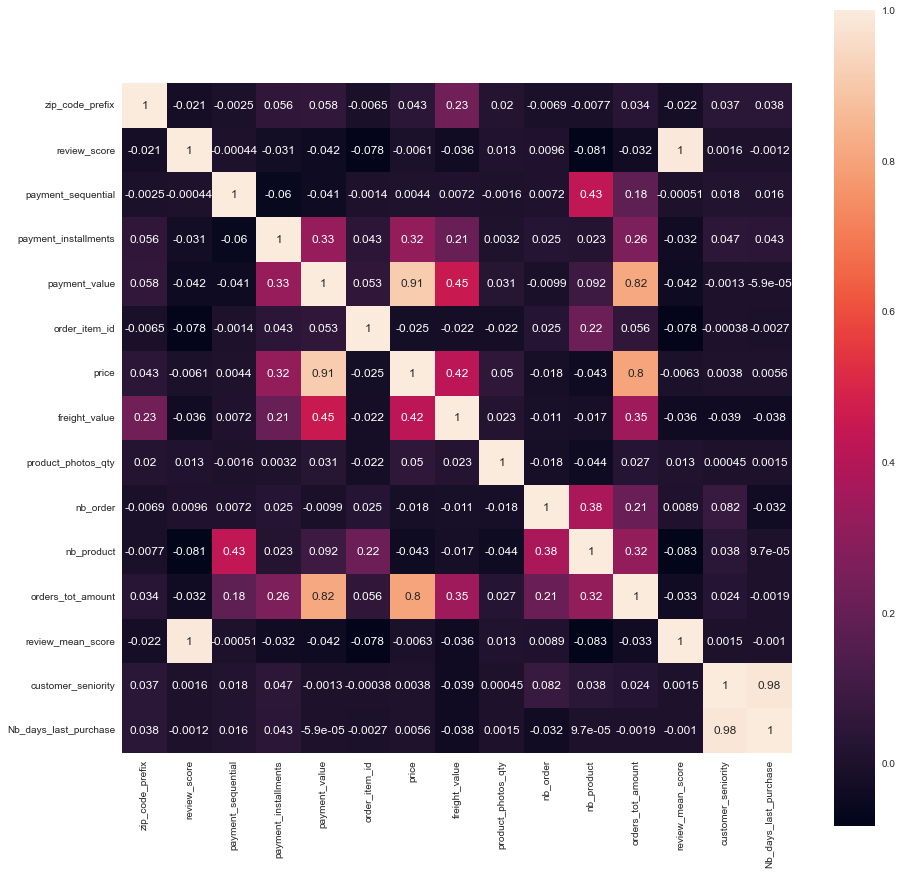

In [23]:
# Analyse de corrélation
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, square=True)
plt.show()

## K-means Clustering

### 3 variables

In [124]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount']]

In [25]:
X.head()

,nb_order,Nb_days_last_purchase,orders_tot_amount
0,1,571,124.99
1,1,453,225.98
3,1,521,124.99
4,1,281,106.99
5,1,625,126.99


In [125]:
s = preprocessing.StandardScaler().fit(X)

In [126]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

On peut définir le nombre de clusters en appliquant la règle du coude

Text(0.5, 0, 'Number of clusters')

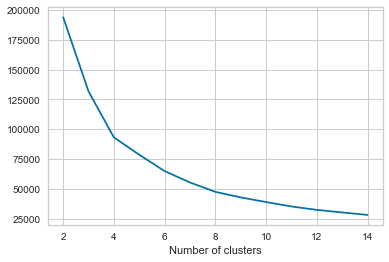

In [35]:
# Utilisation de la méthode du coude pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = [] 
for i in range(2, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_std) 
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 15), wcss) 
plt.xlabel('Number of clusters')

Le point auquel la forme du coude est créée est 4 ? On peut le confirmer par application fonction plus élaborée.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from numpy import unique
from numpy import where

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA
from matplotlib.patches import Circle

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from sklearn import cluster
from sklearn import decomposition
from sklearn import metrics

from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from sklearn.cluster import KMeans

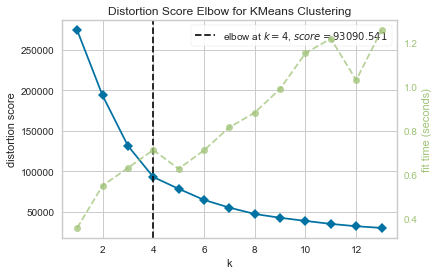

In [36]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data
plt.show()

On peut aussi utiliser le silhouette score

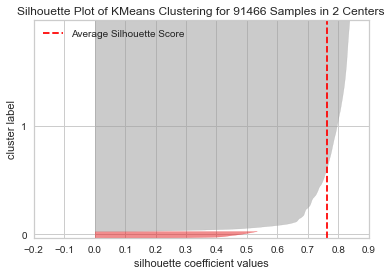

In [37]:
# Instantiate the clustering model and visualizer for 2 clusters
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.76

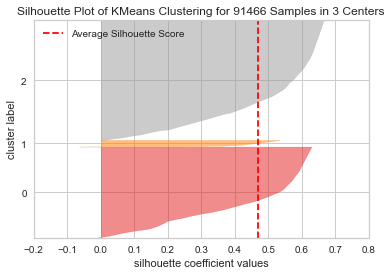

In [38]:
# Instantiate the clustering model and visualizer for 3 clusters
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.47

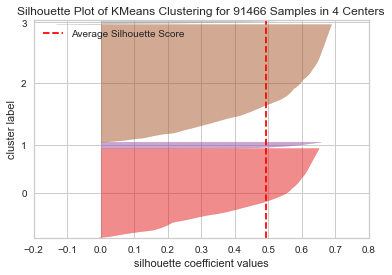

In [39]:
# Instantiate the clustering model and visualizer for 4 clusters
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.495

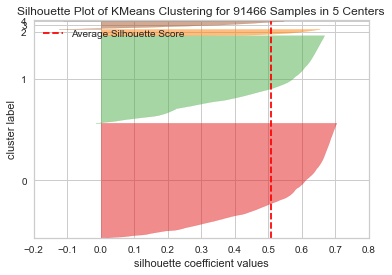

In [40]:
# Instantiate the clustering model and visualizer for 5 clusters
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.505

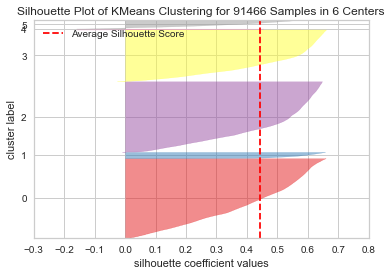

In [41]:
# Instantiate the clustering model and visualizer for 6 clusters
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.44

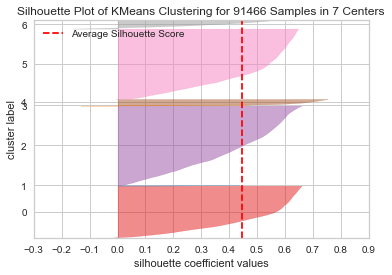

In [42]:
# Instantiate the clustering model and visualizer for 7 clusters
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.44

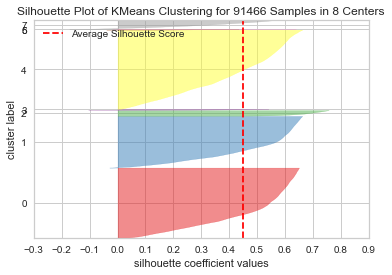

In [43]:
# Instantiate the clustering model and visualizer for 8 clusters
model = KMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.45

**3 clusters**



In [127]:
k_means_3 = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y3 = k_means_3.fit_predict(X_std)
print(y3)

[1 1 1 ... 0 1 1]


C:\Users\lemis\AppData\Local\Temp/ipykernel_17996/790599365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y3


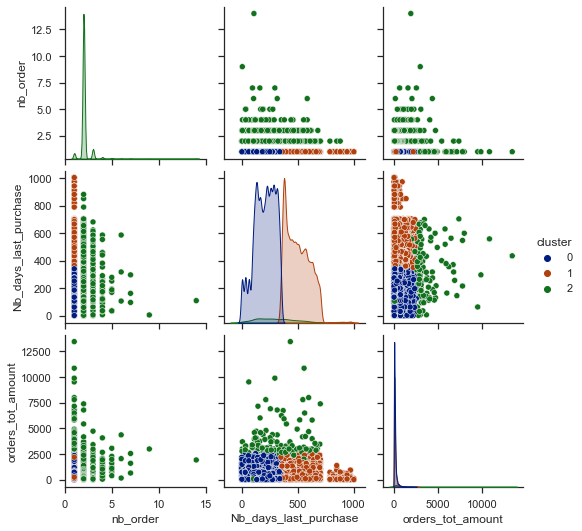

In [128]:
X['cluster'] = y3
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='dark')

***Caractérisation des clusters***

Cluster 0: Les nouveaux clients qui ne dépensent pas beaucoup

Cluster 1: Les clients anciens qui ne dépensent pas beaucoup

Cluster 2: Anciens et nouveaux clients qui dépensent plus

**4 clusters**

La règle du coude définit le nombre optimal de clusters égal à 4

In [68]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount']]

In [69]:
s = preprocessing.StandardScaler().fit(X)

In [70]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

In [71]:
k_means_4 = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y4 = k_means_4.fit_predict(X_std)
print(y4)

[3 3 3 ... 0 3 3]


In [74]:
X['cluster'] = y4

C:\Users\lemis\AppData\Local\Temp/ipykernel_17996/2860411689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y4


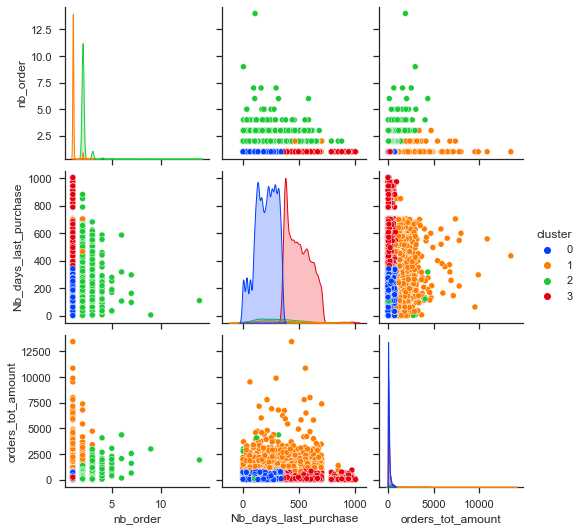

In [75]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='bright')

***Caractérisation des clusters***

Cluster 0: Les clients qui ont commandé récemment et qui ne commandent pas et ne dépensent pas beaucoup

Cluster 1: Les clients qui ont commandé récemment et il y a longtemps et qui dépensent beaucoup mais avec le nombre des commandes bas

Cluster 2: Les clients qui ont commandé récemment et qui dépensent montant moyen avec beaucoup de comandes

Cluster 3: Les clients qui n'ont pas commandé depuis longtemps et qui ne dépensent pas et ne commandent pas beaucoup

**4 variable**

In [76]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount', 'review_mean_score']]

In [77]:
s = preprocessing.StandardScaler().fit(X)

In [78]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

**Elbow rule**

Text(0.5, 0, 'Number of clusters')

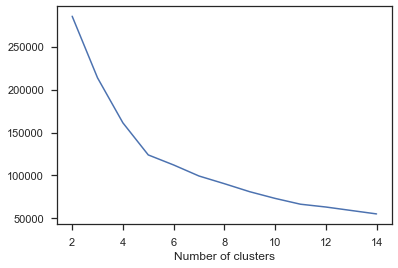

In [79]:
# Utilisation de la méthode du coude pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = [] 
for i in range(2, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_std) 
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 15), wcss) 
plt.xlabel('Number of clusters')

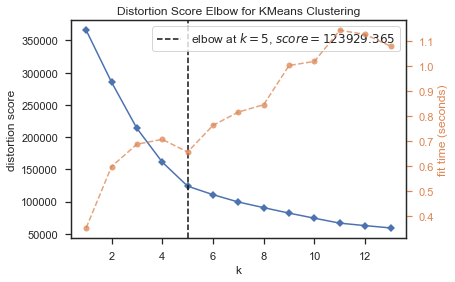

In [80]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data
plt.show()

Le point auquel la forme du coude est créée est 5

**Siluhette analysis**

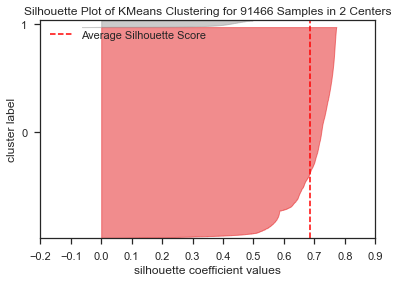

In [81]:
# Instantiate the clustering model and visualizer for 2 clusters
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.69

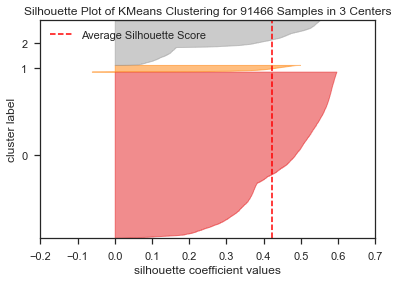

In [82]:
# Instantiate the clustering model and visualizer for 3 clusters
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.42

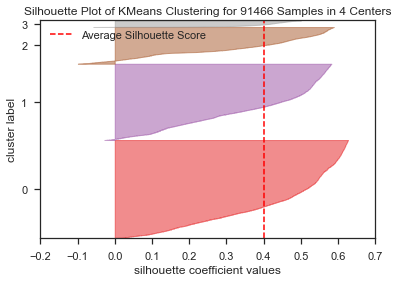

In [83]:
# Instantiate the clustering model and visualizer for 4 clusters
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.40

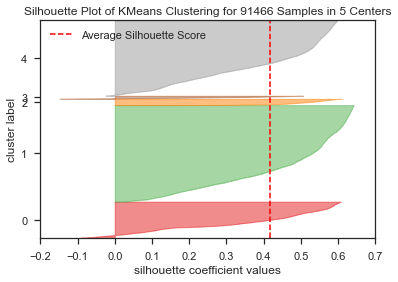

In [84]:
# Instantiate the clustering model and visualizer for 5 clusters
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.42

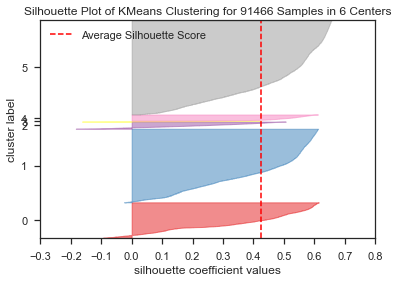

In [85]:
# Instantiate the clustering model and visualizer for 6 clusters
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.42

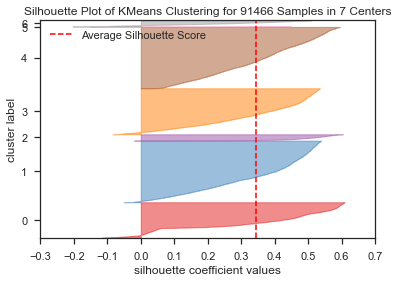

In [86]:
# Instantiate the clustering model and visualizer for 7 clusters
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.34

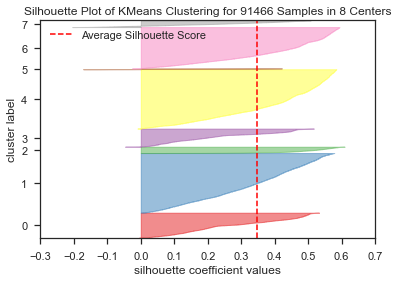

In [87]:
# Instantiate the clustering model and visualizer for 8 clusters
model = KMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_std)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

Silhouette Score est approximativement 0.34

**3 clusters**

In [88]:
k_means_3 = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y3 = k_means_3.fit_predict(X_std)
print(y3)

[0 1 1 ... 0 0 0]


C:\Users\lemis\AppData\Local\Temp/ipykernel_17996/790599365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y3


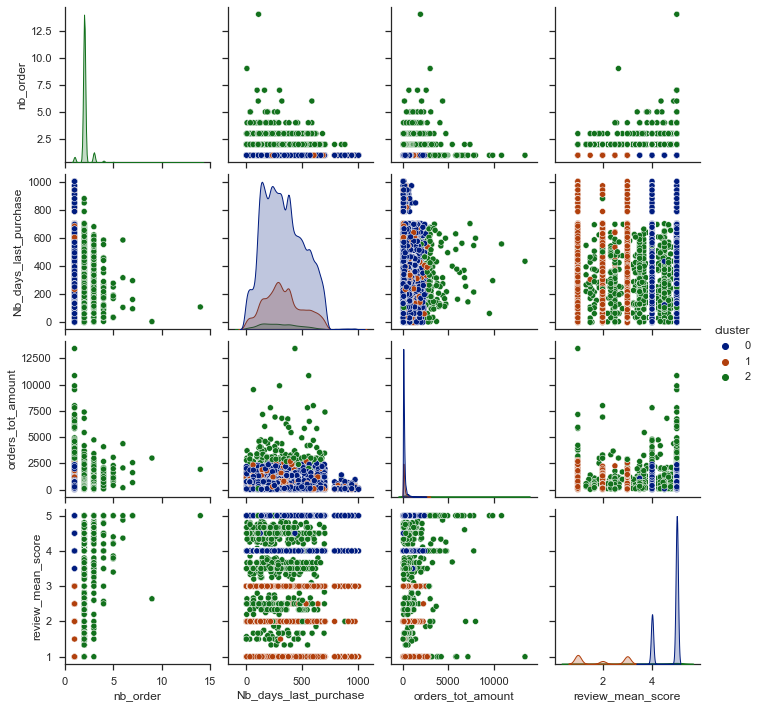

In [91]:
X['cluster'] = y3
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='dark')

***Caractérisation des clusters***

Cluster 0: Anciens et nouveaux clients qui ne dépensent pas beaucoup et donnent des notes de révision plus positives

Cluster 1: Anciens et nouveaux clients qui ne dépensent pas beaucoup et donnent des notes de révision plus negatives

Cluster 2: Anciens et nouveaux clients qui dépensent plus et donnent des notes de révision plus positives

**4 clusters**


In [98]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount', 'review_mean_score']]

In [99]:
s = preprocessing.StandardScaler().fit(X)

In [100]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

In [95]:
k_means_4 = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y4 = k_means_4.fit_predict(X_std)
print(y4)

[0 2 0 ... 1 0 0]


In [96]:
X['cluster'] = y4

C:\Users\lemis\AppData\Local\Temp/ipykernel_17996/2860411689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y4


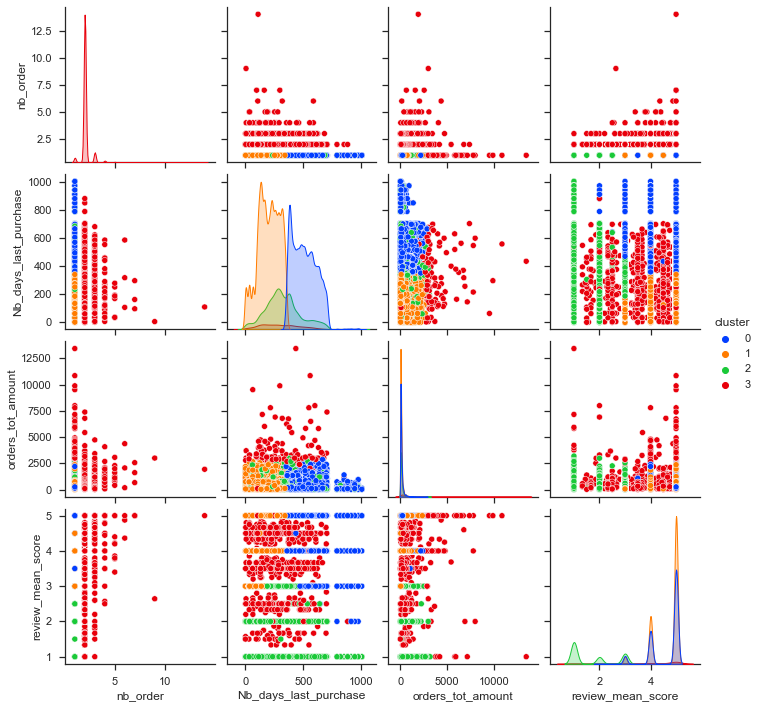

In [97]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='bright')

***Caractérisation des clusters***

Cluster 0: Les clients qui n'ont pas commandé depuis longtemps, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup  et donnent des notes de révision plus positives

Cluster 1: Les clients qui ont commandé récemment, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup et donnent des notes de révision plus positives

Cluster 2: Les clients qui ont commandé récemment et il y a longtemps, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup et donnent des notes de révision plus negatives

Cluster 3: Les clients qui ont commandé récemment et il y a longtemps, qui dépensent et commandent plus et donnent des notes de révision plus positives


In [101]:
k_means_5 = KMeans(n_clusters = 5, init = 'k-means++',  random_state=42)
y5 = k_means_5.fit_predict(X_std)
print(y5)

[4 1 4 ... 0 4 4]


In [102]:
X['cluster'] = y5

C:\Users\lemis\AppData\Local\Temp/ipykernel_17996/4201993626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = y5


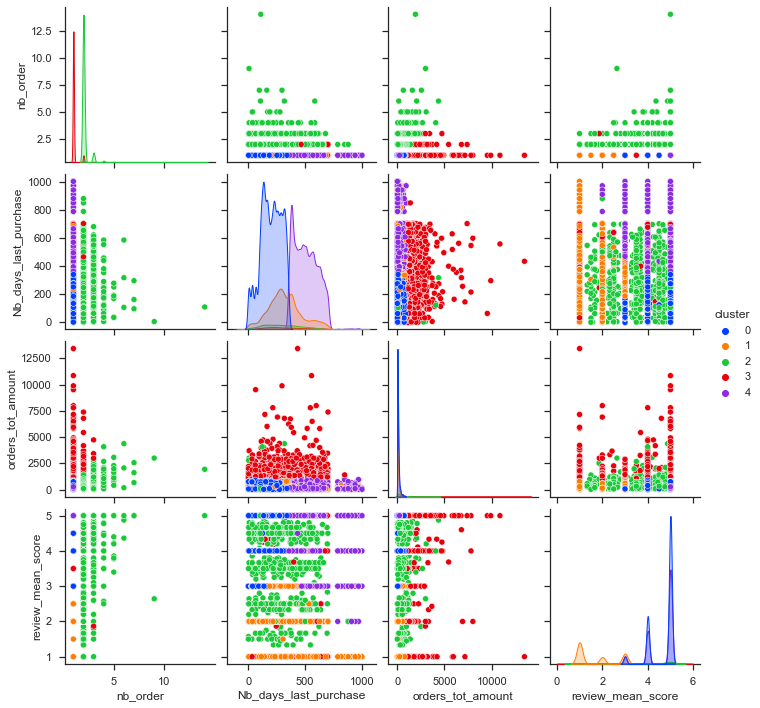

In [103]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='bright')

***Caractérisation des clusters***

Cluster 0: Les clients qui ont commandé récemment, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup  et donnent des notes de révision plus positives

Cluster 1: Les clients qui n'ont pas commandé depuis longtemps, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup et donnent des notes de révision plus negatives

Cluster 2: Les clients qui ont commandé récemment, qui dépensent la montant moyenne avec beaucoup de commandes et donnent des notes de révision plus positives

Cluster 3: Les clients qui ont commandé récemment et il y a longtemps, qui dépensent et commandent beaucoup et donnent des notes de révision plus positives

Cluster 4: Les clients qui n'ont pas commandé depuis longtemps, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup et donnent des notes de révision plus positives

## Hierarchical Clustering

In [104]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount', 'review_mean_score']]

In [105]:
import scipy.cluster.hierarchy as sch

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [107]:
X = X.sample(frac=0.1)

In [108]:
s = preprocessing.StandardScaler().fit(X)

In [109]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

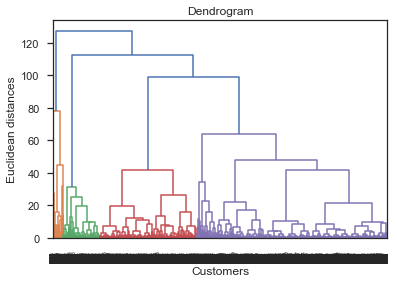

In [110]:
dendrogram = sch.dendrogram(sch.linkage(X_std, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Nous recherchons la plus grande distance que nous pouvons verticalement sans traverser aucune ligne horizontale et celle-ci est la première ligne bleue sur le schéma ci-dessus. Comptons le nombre de lignes sur le diagramme et déterminons le nombre optimal de clusters (orange, blue et 2 rouge).

Le nombre des clusters 5 est optimal.

In [111]:
# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [112]:
y_hc=hc.fit_predict(X_std)

In [113]:
X['cluster'] = y_hc

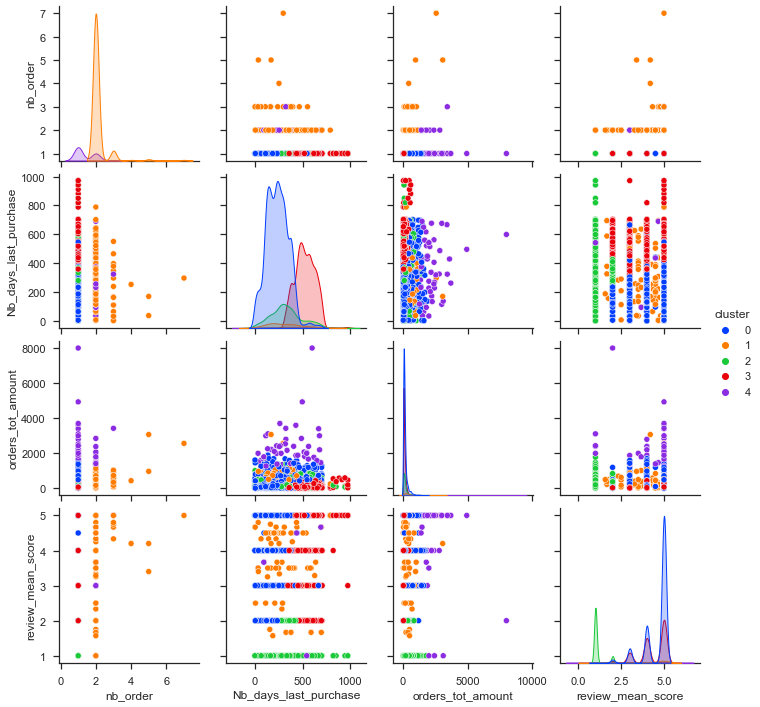

In [114]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='bright')

***Caractérisation des clusters***

Cluster 0: Les clients qui ont commandé récemment et il y a longtemps, qui ne dépensent  pas et et ne commandent pas beaucoup et donnent des notes de révision plus positives

Cluster 1: Les clients qui ont commandé récemment, qui dépensent la montant moyenne avec beaucoup de commandes et donnent des notes de révision plus positives

Cluster 2: Les clients qui ont commandé récemment et il y a longtemps, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup et donnent des notes de révision plus negatives

Cluster 3: Les clients qui n'ont pas commandé depuis longtemps, qui ne dépensent pas beaucoup, qui ne commandent pas beaucoup et donnent des notes de révision plus positives

Cluster 4: Les clients qui ont commandé récemment et il y a longtemps, qui dépensent et commandent beaucoup et donnent des notes de révision plus positives

**4 clusters**

In [141]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount', 'review_mean_score']]

In [142]:
X = X.sample(frac=0.1)

In [143]:
s = preprocessing.StandardScaler().fit(X)

In [144]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

In [145]:
# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [146]:
y_hc4=hc.fit_predict(X_std)

In [147]:
X['cluster'] = y_hc4

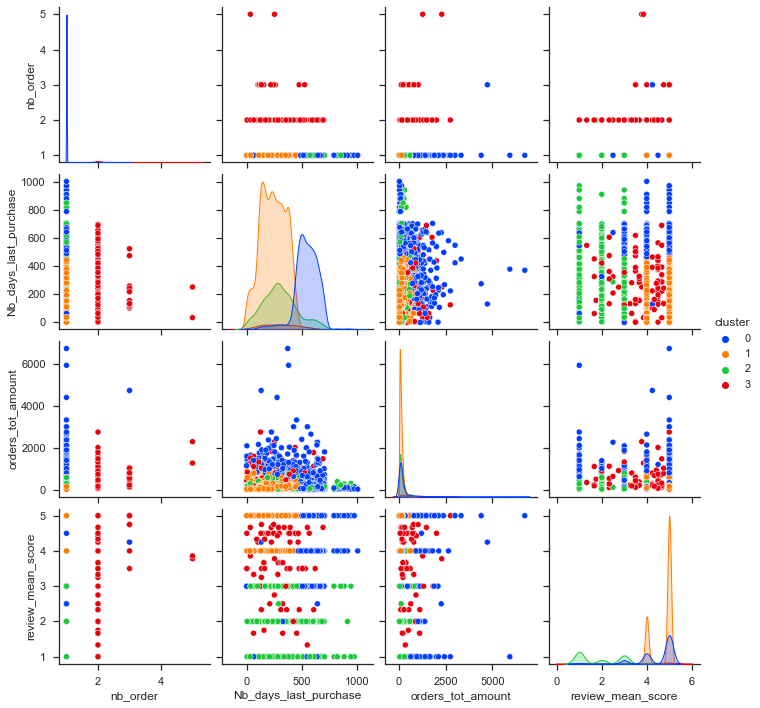

In [148]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = X, hue = 'cluster', palette='bright')

***Caractérisation des clusters***

Cluster 0: Anciens et nouveaux clients qui dépensent plus et donnent des notes de révision differentes

Cluster 1: Les nouveaux clients qui ne dépensent pas beaucoup et donnent des notes de révision plus positives

Cluster 2: Anciens et nouveaux clients qui ne dépensent pas beaucoup et donnent des notes de révision plus negatives

Cluster 3: Anciens et nouveaux clients qui depenent le mantant moyen pas et donnent des notes de révision differents

## DBSCAN

2 paramètres :

- La distance epsilon

- Le nombre minimum de points MinPts devant se trouver dans un rayon epsilon pour que ces points soient considérés comme un cluster.

In [115]:
X = data[['nb_order', 'Nb_days_last_purchase', 'orders_tot_amount', 'review_mean_score']]

In [116]:
s = preprocessing.StandardScaler().fit(X)

In [117]:
X_std = pd.DataFrame(s.transform(X),columns=X.columns)

In [118]:
coeffSilhouette = []
numberOfCluster = []
for i in range(1,16):
    print('eps =',i/10)
    db=DBSCAN(eps=i/10, min_samples=10,).fit(X_std)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    
    coeffSilhouette.append(silhouette_score(X_std, db.labels_))
    numberOfCluster.append(n_clusters_)

    # I assign the calculated labels in a new column of the DataFrame df4
    # for future analysis of the number of customers per cluster.
    X_std['cluster_for_EPS_'+str(i/10)] =\
    pd.DataFrame(data=db.labels_,
                 index=X_std.index)

eps = 0.1
eps = 0.2
eps = 0.3
eps = 0.4
eps = 0.5
eps = 0.6
eps = 0.7
eps = 0.8
eps = 0.9
eps = 1.0
eps = 1.1
eps = 1.2
eps = 1.3
eps = 1.4
eps = 1.5


In [119]:
# Saving the coeffSilhouette and numberOfCluster Lists
pickle.dump(coeffSilhouette, open('dbscan_coeffSilhouette_4f', 'wb'))
pickle.dump(numberOfCluster, open('dbscan_numberOfCluster_4f', 'wb'))
# Restoration of the coeffSilhouette and numberOfCluster lists
# coeffSilhouette = pickle.load(open('dbscan_coeffSilhouette_4f', 'rb'))
# numberOfCluster = pickle.load(open('dbscan_numberOfCluster_4f', 'rb'))

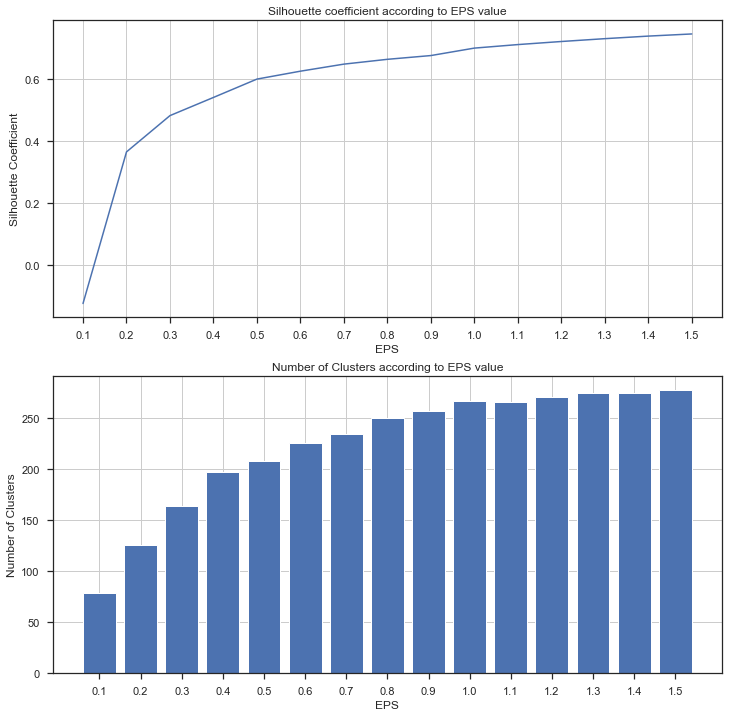

In [120]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(list(map(str, np.linspace(1,15,15,dtype='int')/10)), coeffSilhouette)
plt.grid()
plt.xlabel('EPS')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette coefficient according to EPS value')
plt.subplot(212)
plt.bar(list(map(str, np.linspace(1,15,15,dtype='int')/10)), numberOfCluster)
plt.grid()
plt.xlabel('EPS')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters according to EPS value')
plt.show()

In [123]:
for i,j in enumerate(X_std.columns[4:]):
    print('-----------------------------')
    print('Number of Clusters for EPS =',
          (i+1)/10,
          ':',
          X_std[j].nunique())
    for index, value in X_std[j].value_counts().sort_index().items():
        print(f'Cluster n°{index} -- Number of customers: {value}')
    print('-----------------------------')

-----------------------------
Number of Clusters for EPS = 0.1 : 79
Cluster n°-1 -- Number of customers: 6127
Cluster n°0 -- Number of customers: 15847
Cluster n°1 -- Number of customers: 7259
Cluster n°2 -- Number of customers: 6425
Cluster n°3 -- Number of customers: 2178
Cluster n°4 -- Number of customers: 48222
Cluster n°5 -- Number of customers: 268
Cluster n°6 -- Number of customers: 23
Cluster n°7 -- Number of customers: 845
Cluster n°8 -- Number of customers: 268
Cluster n°9 -- Number of customers: 279
Cluster n°10 -- Number of customers: 119
Cluster n°11 -- Number of customers: 864
Cluster n°12 -- Number of customers: 118
Cluster n°13 -- Number of customers: 150
Cluster n°14 -- Number of customers: 911
Cluster n°15 -- Number of customers: 18
Cluster n°16 -- Number of customers: 145
Cluster n°17 -- Number of customers: 11
Cluster n°18 -- Number of customers: 120
Cluster n°19 -- Number of customers: 15
Cluster n°20 -- Number of customers: 87
Cluster n°21 -- Number of customers: 

 L'utilisation de DBSCAN dans notre cas est inexploitable pour une utilisation métier car les clusters ne sont pas équilibrés.